In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [17]:
hmeq = pd.read_csv('../data/hmeq.csv')

In [18]:
hmeq.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [19]:
hmeq.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

If credit lines =  0 then clage has to be zero

In [20]:
hmeq.loc[(hmeq['CLAGE'].isnull()==True) & (hmeq['CLNO']==0)]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
21,1,2400,50000.0,73395.0,HomeImp,ProfExe,5.0,1.0,0.0,NaN,1.0,0.0,NaN
92,0,4000,NaN,45760.0,HomeImp,NaN,0.0,0.0,0.0,NaN,0.0,0.0,NaN
118,0,4500,NaN,49044.0,HomeImp,NaN,0.0,0.0,0.0,NaN,0.0,0.0,11.652739
220,0,5300,NaN,49396.0,HomeImp,NaN,0.0,0.0,0.0,NaN,0.0,0.0,12.043671
298,0,5900,NaN,51189.0,HomeImp,NaN,1.0,0.0,0.0,NaN,0.0,0.0,12.749181
329,0,6000,NaN,53190.0,HomeImp,NaN,0.0,0.0,0.0,NaN,0.0,0.0,15.174415
341,0,6100,NaN,46830.0,HomeImp,NaN,0.0,0.0,1.0,NaN,0.0,0.0,13.306013
418,0,6600,NaN,48800.0,HomeImp,NaN,0.0,0.0,0.0,NaN,0.0,0.0,12.219436
422,0,6600,NaN,46516.0,HomeImp,NaN,0.0,0.0,0.0,NaN,0.0,0.0,14.845991
552,0,7400,NaN,54138.0,HomeImp,NaN,1.0,0.0,0.0,NaN,0.0,0.0,12.219680


In [21]:
hmeq.loc[(hmeq['CLAGE'].isnull()==True) & (hmeq['CLNO']==0),'CLAGE']=0

This does not make sense, clno number is wrong so we can replace 0 by the mean

In [22]:
hmeq.loc[(hmeq['CLAGE']!=0) & (hmeq['CLNO']==0)]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
3097,1,16800,87300.0,155500.0,DebtCon,Other,3.0,0.0,0.0,1154.633333,0.0,0.0,NaN
3679,1,19300,96454.0,157809.0,DebtCon,Other,3.0,0.0,0.0,1168.233561,0.0,0.0,40.206138


In [23]:
hmeq.loc[(hmeq['CLAGE']!=0) & (hmeq['CLNO']==0),'CLNO'] = hmeq['CLNO'].mean()

In [24]:
hmeq_delete_null = hmeq.copy()

I am going to delete rows without mortdue because mortdue affects a lot BAD

In [25]:
hmeq_delete_null.dropna(subset=['MORTDUE','VALUE','CLAGE'],inplace=True)

In [26]:
hmeq_delete_null.isnull().sum()

BAD           0
LOAN          0
MORTDUE       0
VALUE         0
REASON      120
JOB         106
YOJ         266
DEROG       400
DELINQ      257
CLAGE         0
NINQ        207
CLNO          0
DEBTINC    1053
dtype: int64

In [27]:
hmeq_delete_null.shape

(5197, 13)

borrar debtinc column

In [28]:
hmeq.shape[0]

5960

In [29]:
hmeq.dtypes

BAD          int64
LOAN         int64
MORTDUE    float64
VALUE      float64
REASON      object
JOB         object
YOJ        float64
DEROG      float64
DELINQ     float64
CLAGE      float64
NINQ       float64
CLNO       float64
DEBTINC    float64
dtype: object

I have to change REASON and JOB to numeric.

In [30]:
hmeq['REASON'].unique()

array(['HomeImp', nan, 'DebtCon'], dtype=object)

In [31]:
hmeq['JOB'].unique()

array(['Other', nan, 'Office', 'Sales', 'Mgr', 'ProfExe', 'Self'],
      dtype=object)

# Handling missing values

In [32]:
def distributions(column):
    plt.figure()
    mean = hmeq[column].mean()
    mode = hmeq[column].mode().to_numpy()[0]
    median = hmeq[column].median()
    fig = sns.distplot(hmeq[column].dropna());
    fig.axvline(mean, color='r', linestyle='--');
    fig.axvline(median, color='g', linestyle='-');
    fig.axvline(mode, color='b', linestyle='-');
    plt.legend({'Mean':mean,'Median':median,'Mode':mode});
    return fig

In [33]:
null_values = pd.DataFrame(hmeq.isnull().sum())
null_values.drop(['REASON','JOB'],inplace=True)

In [34]:
null_columns = list(null_values.loc[null_values[0]>0].index)

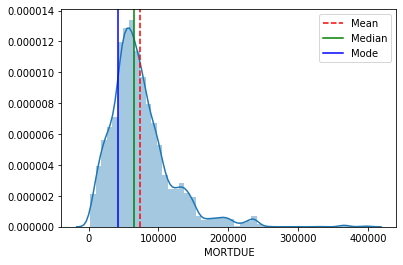

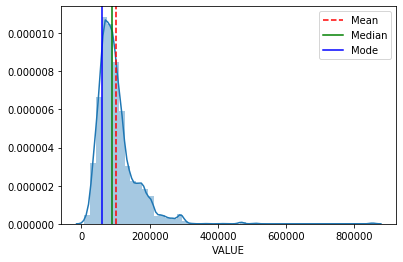

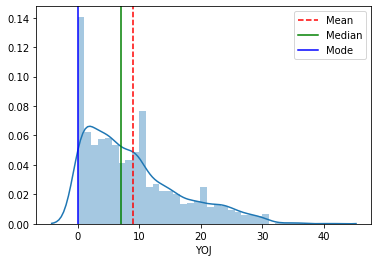

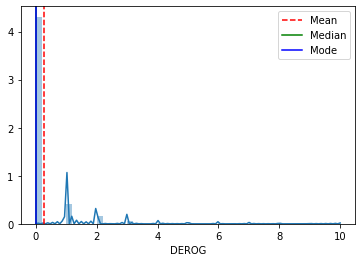

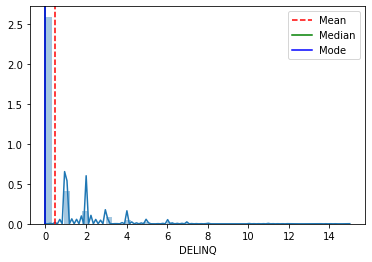

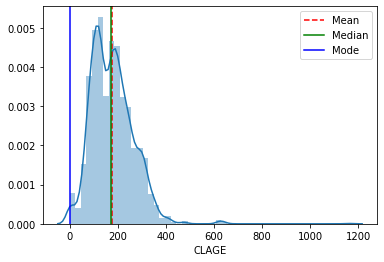

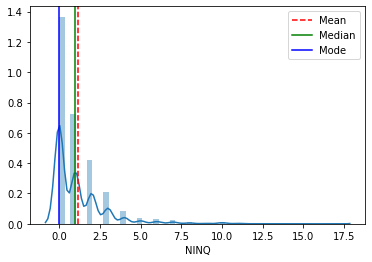

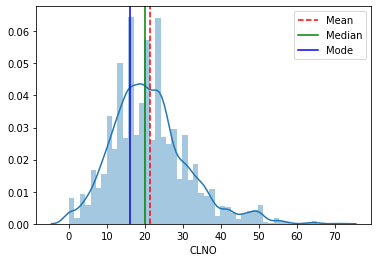

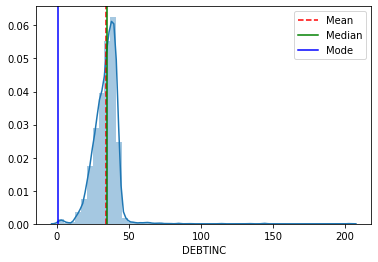

In [35]:
[distributions(column) for column in null_columns];

#### Mortdue null values
I am going to replace null values by the random values from np normal distribution,
taking into account mean and std of MORTDUE without null values.

In [36]:
def normal_replacement(df,column):
    mean = hmeq[column].mean()
    std = hmeq[column].std()
    return abs(np.random.normal(mean,std, size=hmeq.isnull().sum()[column]))

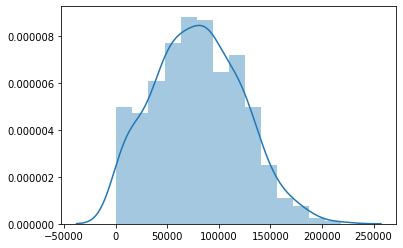

In [37]:
mortdue_replacement = normal_replacement(hmeq,'MORTDUE')
sns.distplot(mortdue_replacement);

Replace the null values by the np.random.normal array we have created, and we get the following distribution

In [38]:
def replace(df,column,l):
    for i in range(len(l)):
        df.loc[df[column].isnull()==True,column] = l[i]

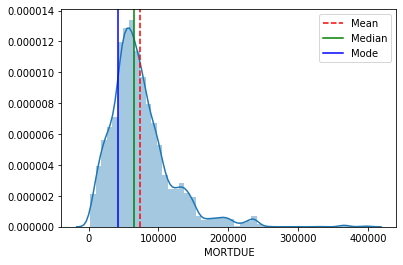

In [39]:
distributions('MORTDUE')
replace(hmeq,'MORTDUE',mortdue_replacement)

In [40]:
# Verify I have changed all the null values
hmeq.isnull().sum()

BAD           0
LOAN          0
MORTDUE       0
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       248
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

#### VALUE null values
I am going to apply the same strategy

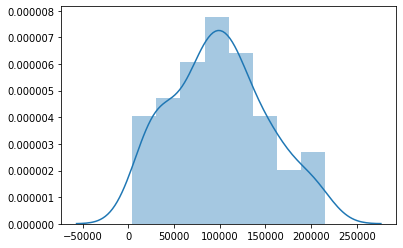

In [41]:
value_replacement = normal_replacement(hmeq,'VALUE')
sns.distplot(value_replacement);

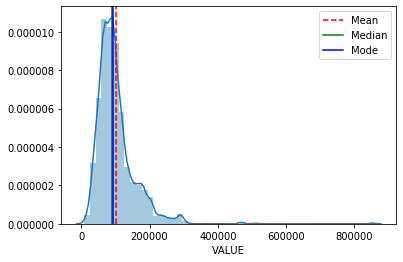

In [42]:
replace(hmeq,'VALUE',value_replacement)
distributions('VALUE');

#### CLAGE null values
I am going to use normal distribution again

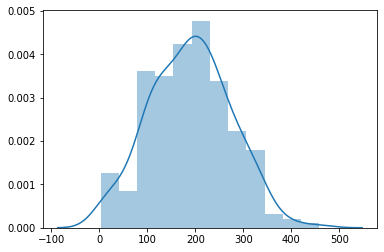

In [43]:
clage_replacement = normal_replacement(hmeq,'CLAGE')
sns.distplot(clage_replacement);

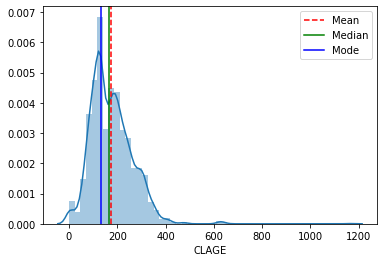

In [44]:
replace(hmeq,'CLAGE',clage_replacement)
distributions('CLAGE');

#### CLNO null values
I am going to use normal distribution again

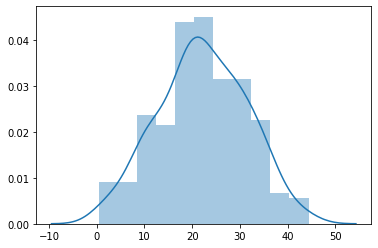

In [45]:
clno_replacement = normal_replacement(hmeq,'CLNO')
sns.distplot(clno_replacement);

In [46]:
clno_replacement_2 = normal_replacement(hmeq_delete_null,'CLNO')

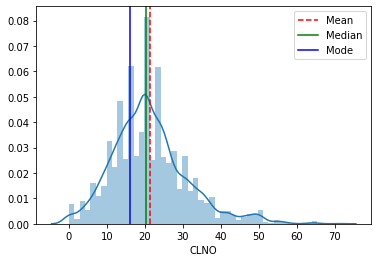

In [47]:
replace(hmeq_delete_null,'CLNO',clno_replacement_2)
replace(hmeq,'CLNO',clno_replacement)
distributions('CLNO');

#### YOJ null values
I am going to divide the null values into two groups of equal size. One I am going to replace the null values by 0 (because the mode is 0 years working) and then I am going to replace the other group by a numpy random array following a uniform distribution from the mode to the mean. 

In [48]:
first_group_size = hmeq.isnull().sum()['YOJ']//2

In [49]:
second_group_size = hmeq.isnull().sum()['YOJ'] - first_group_size

In [50]:
zero_values = np.zeros(first_group_size)

In [51]:
uniform_values = np.random.uniform(hmeq['YOJ'].mode(),hmeq['YOJ'].mean(),second_group_size)

In [52]:
yoj_replacement = np.concatenate([zero_values,uniform_values], axis=0)

In [53]:
np.random.shuffle(yoj_replacement)

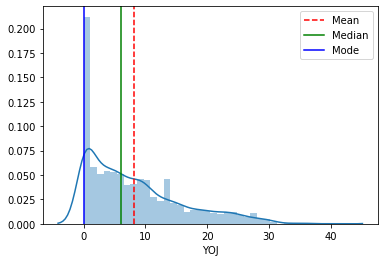

In [54]:
replace(hmeq,'YOJ', yoj_replacement)
replace(hmeq_delete_null,'YOJ', yoj_replacement)
distributions('YOJ');

#### DEROG, DEBTINC, NINQ and DELINQ null values
Replace null values by the mode, 0

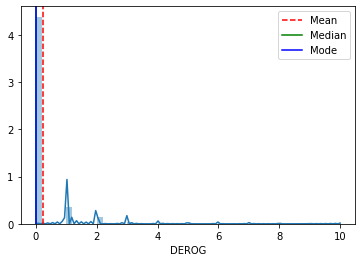

In [55]:
def replace_by_zero(df,column):
    replacement = np.zeros(df.isnull().sum()[column])
    return replace(df,column,replacement)
replace_by_zero(hmeq,'DEROG')
replace_by_zero(hmeq_delete_null,'DEROG')
distributions('DEROG');

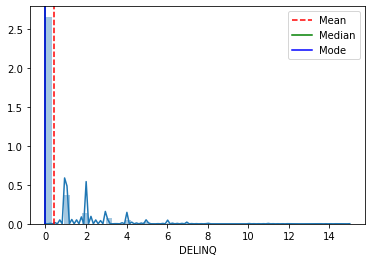

In [56]:
replace_by_zero(hmeq,'DELINQ')
replace_by_zero(hmeq_delete_null,'DELINQ')
distributions('DELINQ');

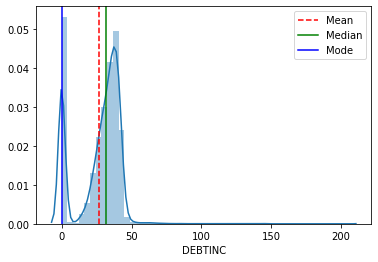

In [57]:
replace_by_zero(hmeq,'DEBTINC')
replace_by_zero(hmeq_delete_null,'DEBTINC')
distributions('DEBTINC');

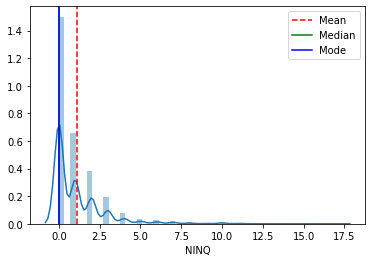

In [58]:
replace_by_zero(hmeq,'NINQ')
replace_by_zero(hmeq_delete_null,'NINQ')
distributions('NINQ');

Verify I have no numeric null values left

In [59]:
hmeq.isnull().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE        0
REASON     252
JOB        279
YOJ          0
DEROG        0
DELINQ       0
CLAGE        0
NINQ         0
CLNO         0
DEBTINC      0
dtype: int64

## Replace non numeric null values
#### REASON null values
In order to keep the ratio, I am going to divide the null values into 3, 2 parts I am going replace the value by DebtCon and the other third by HomeImp. 

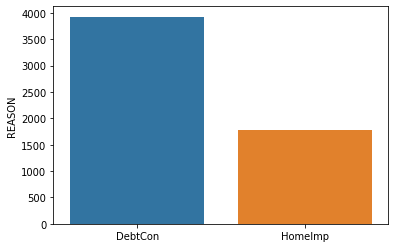

In [60]:
vc_reason = hmeq['REASON'].value_counts()
sns.barplot(x = vc_reason.index, y = vc_reason);

In [61]:
one_third_reason=hmeq.isnull().sum()['REASON']//3

In [62]:
reason_one = np.array(['DebtCon']*one_third_reason*2)

In [63]:
reason_two= np.array(['DebtCon']*one_third_reason)

In [64]:
reason_replacement = np.concatenate([reason_one,reason_two])

In [65]:
np.random.shuffle(reason_replacement)

In [66]:
replace(hmeq,'REASON',reason_replacement)
replace(hmeq_delete_null,'REASON',reason_replacement)

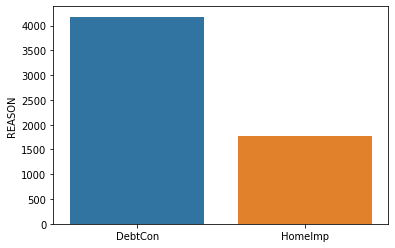

In [67]:
vc_reason = hmeq['REASON'].value_counts()
sns.barplot(x = vc_reason.index, y = vc_reason);

#### JOB null values
Replace the null values by 'other'

In [68]:
hmeq['JOB'].unique()

array(['Other', nan, 'Office', 'Sales', 'Mgr', 'ProfExe', 'Self'],
      dtype=object)

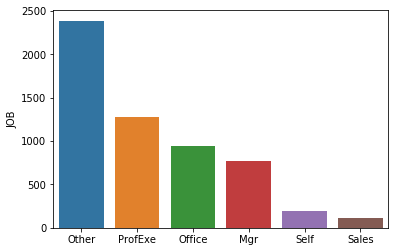

In [69]:
vc_jobs = hmeq['JOB'].value_counts()
sns.barplot(x = vc_jobs.index ,y = vc_jobs);

In [70]:
job_replacement = ['Other']*hmeq.isnull().sum()['JOB']

In [71]:
replace(hmeq,'JOB',job_replacement)
replace(hmeq_delete_null,'JOB',job_replacement)

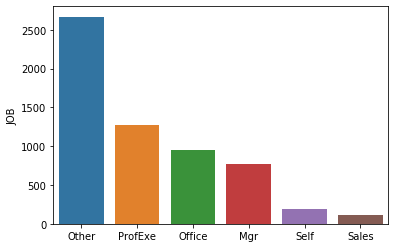

In [72]:
vc_jobs = hmeq['JOB'].value_counts()
sns.barplot(x = vc_jobs.index ,y = vc_jobs);

In [73]:
# Verify we have no null values left.
hmeq.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [74]:
hmeq_delete_null.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [75]:
hmeq_delete_debtinc = hmeq_delete_null.copy()
hmeq_delete_debtinc.drop(columns=['DEBTINC'],inplace=True);

Change REASON and JOB to numeric using get_dummies

In [76]:
hm = hmeq.copy()
hm = pd.get_dummies(hm)
hm.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1100,25860.000000,39025.000000,10.5,0.0,0.0,94.366667,1.0,9.000000,0.0,0,1,0,0,1,0,0,0
1,1,1300,70053.000000,68400.000000,7.0,0.0,2.0,121.833333,0.0,14.000000,0.0,0,1,0,0,1,0,0,0
2,1,1500,13500.000000,16700.000000,4.0,0.0,0.0,149.466667,1.0,10.000000,0.0,0,1,0,0,1,0,0,0
3,1,1500,80013.580438,94093.914666,0.0,0.0,0.0,133.030603,0.0,20.215813,0.0,1,0,0,0,1,0,0,0
4,0,1700,97800.000000,112000.000000,3.0,0.0,0.0,93.333333,0.0,14.000000,0.0,0,1,0,1,0,0,0,0


In [77]:
hm_del_null = hmeq_delete_null.copy()
hm_del_debtinc = hmeq_delete_debtinc.copy()
hm_del_null=pd.get_dummies(hm_del_null)
hm_del_debtinc=pd.get_dummies(hm_del_debtinc)

In [78]:
hm.dtypes

BAD                 int64
LOAN                int64
MORTDUE           float64
VALUE             float64
YOJ               float64
DEROG             float64
DELINQ            float64
CLAGE             float64
NINQ              float64
CLNO              float64
DEBTINC           float64
REASON_DebtCon      uint8
REASON_HomeImp      uint8
JOB_Mgr             uint8
JOB_Office          uint8
JOB_Other           uint8
JOB_ProfExe         uint8
JOB_Sales           uint8
JOB_Self            uint8
dtype: object

In [79]:
# Export the csv file
hm.to_csv('../data/hmeq_clean.csv')
hm_del_null.to_csv('../data/hmeq_clean_del_null.csv')
hm_del_debtinc.to_csv('../data/hmeq_clean_del_debtinc.csv')

In [80]:
hmeq_clean = pd.read_csv('../data/hmeq_clean.csv')

In [81]:
# Verify I have exported the correct version
hmeq_clean.isnull().sum()

Unnamed: 0        0
BAD               0
LOAN              0
MORTDUE           0
VALUE             0
YOJ               0
DEROG             0
DELINQ            0
CLAGE             0
NINQ              0
CLNO              0
DEBTINC           0
REASON_DebtCon    0
REASON_HomeImp    0
JOB_Mgr           0
JOB_Office        0
JOB_Other         0
JOB_ProfExe       0
JOB_Sales         0
JOB_Self          0
dtype: int64

In [82]:
hm_cat = hmeq.copy()
hm_del_null_cat = hmeq_delete_null.copy()
hm_del_debtinc_cat = hmeq_delete_debtinc.copy()

In [83]:
def ratio(x):
    result = x[0]/(x[0]+x[1])
    return result

dfs = [hm_cat,hm_del_null_cat,hm_del_debtinc_cat]

def replace_job(df):
    ct = pd.crosstab(df.JOB,df.BAD)
    rat = ct.apply(ratio,axis=1).sort_values(ascending=False)
    jobs_map = {col: list(rat.index).index(col) for col in rat.index}
    df["JOB"]=df["JOB"].map(jobs_map)
    return df

[replace_job(df)[:3] for df in dfs]

[   BAD  LOAN  MORTDUE    VALUE   REASON  JOB   YOJ  DEROG  DELINQ       CLAGE  \
 0    1  1100  25860.0  39025.0  HomeImp    2  10.5    0.0     0.0   94.366667   
 1    1  1300  70053.0  68400.0  HomeImp    2   7.0    0.0     2.0  121.833333   
 2    1  1500  13500.0  16700.0  HomeImp    2   4.0    0.0     0.0  149.466667   
 
    NINQ  CLNO  DEBTINC  
 0   1.0   9.0      0.0  
 1   0.0  14.0      0.0  
 2   1.0  10.0      0.0  ,
    BAD  LOAN  MORTDUE    VALUE   REASON  JOB   YOJ  DEROG  DELINQ       CLAGE  \
 0    1  1100  25860.0  39025.0  HomeImp    2  10.5    0.0     0.0   94.366667   
 1    1  1300  70053.0  68400.0  HomeImp    2   7.0    0.0     2.0  121.833333   
 2    1  1500  13500.0  16700.0  HomeImp    2   4.0    0.0     0.0  149.466667   
 
    NINQ  CLNO  DEBTINC  
 0   1.0   9.0      0.0  
 1   0.0  14.0      0.0  
 2   1.0  10.0      0.0  ,
    BAD  LOAN  MORTDUE    VALUE   REASON  JOB   YOJ  DEROG  DELINQ       CLAGE  \
 0    1  1100  25860.0  39025.0  HomeImp    2  1

['NULL', 'Mgr', 'Office', 'Other', 'ProfExe', 'Sales', 'Self']

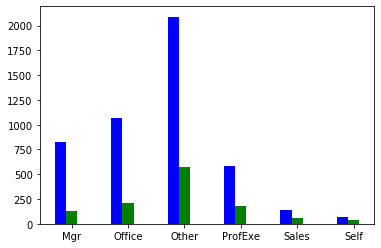

In [84]:
xlab = ['NULL','Mgr', 'Office', 'Other', 'ProfExe', 'Sales', 'Self']
ct = pd.crosstab(hm_cat.JOB,hm_cat.BAD)
x = np.array(list(range(1,7)))
y = ct[0].values
z = ct[1].values
fig, ax = plt.subplots()
ax.bar(x-0.2, y, width=0.2, color='b', align='center');
ax.bar(x, z, width=0.2, color='g', align='center');
ax.set_xticklabels(xlab)
list(xlab)

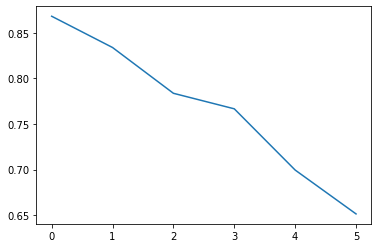

In [85]:
rat = ct.apply(ratio,axis=1).sort_values(ascending=False)
plt.plot(rat);

In [86]:
rat

JOB
0    0.868143
1    0.833856
2    0.783652
3    0.766623
4    0.699482
5    0.651376
dtype: float64

In [87]:
def replace_reason(df):
    ct_reason = pd.crosstab(df.REASON,df.BAD)
    rat_reason = ct_reason.apply(ratio,axis=1).sort_values(ascending=False)
    reason_map = {col: list(rat_reason.index).index(col) for col in rat_reason.index}
    df["REASON"]=df["REASON"].map(reason_map)
    return df

In [88]:
[replace_reason(df)[:3] for df in dfs]

[   BAD  LOAN  MORTDUE    VALUE  REASON  JOB   YOJ  DEROG  DELINQ       CLAGE  \
 0    1  1100  25860.0  39025.0       1    2  10.5    0.0     0.0   94.366667   
 1    1  1300  70053.0  68400.0       1    2   7.0    0.0     2.0  121.833333   
 2    1  1500  13500.0  16700.0       1    2   4.0    0.0     0.0  149.466667   
 
    NINQ  CLNO  DEBTINC  
 0   1.0   9.0      0.0  
 1   0.0  14.0      0.0  
 2   1.0  10.0      0.0  ,
    BAD  LOAN  MORTDUE    VALUE  REASON  JOB   YOJ  DEROG  DELINQ       CLAGE  \
 0    1  1100  25860.0  39025.0       1    2  10.5    0.0     0.0   94.366667   
 1    1  1300  70053.0  68400.0       1    2   7.0    0.0     2.0  121.833333   
 2    1  1500  13500.0  16700.0       1    2   4.0    0.0     0.0  149.466667   
 
    NINQ  CLNO  DEBTINC  
 0   1.0   9.0      0.0  
 1   0.0  14.0      0.0  
 2   1.0  10.0      0.0  ,
    BAD  LOAN  MORTDUE    VALUE  REASON  JOB   YOJ  DEROG  DELINQ       CLAGE  \
 0    1  1100  25860.0  39025.0       1    2  10.5    0.0

In [89]:
[df.to_csv(f'../data/data_{i}.csv') for i,df in enumerate(dfs)]

[None, None, None]

In [90]:
pd.read_csv('../data/data_2.csv').head()

,Unnamed: 0,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO
0,0,1,1100,25860.0,39025.0,1,2,10.5,0.0,0.0,94.366667,1.0,9.0
1,1,1,1300,70053.0,68400.0,1,2,7.0,0.0,2.0,121.833333,0.0,14.0
2,2,1,1500,13500.0,16700.0,1,2,4.0,0.0,0.0,149.466667,1.0,10.0
3,4,0,1700,97800.0,112000.0,1,0,3.0,0.0,0.0,93.333333,0.0,14.0
4,5,1,1700,30548.0,40320.0,1,2,9.0,0.0,0.0,101.466002,1.0,8.0
